In [22]:
from platform import python_version

print(python_version())

3.8.2


In [23]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
import umap as umap


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio2_ETL.csv'
portfolio2 = load_data(filepath)

portfolio2 = portfolio2.drop(columns=['id'])
portfolio2.head()

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,sg_uf_nan,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,11.24,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,43.79,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,16.39,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,39.67,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,20.27,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [24]:
portfolio2.select_dtypes(exclude='int64')

,idade_empresa_anos
0,11.24
1,43.79
2,16.39
3,39.67
4,20.27
...,...
561,10.79
562,15.58
563,23.70
564,18.58


In [25]:
from sklearn.preprocessing import StandardScaler


df = portfolio2
teste = StandardScaler().fit_transform(portfolio2)

df.loc[:,:] = teste
df

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,sg_uf_nan,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,-1.354297,0.0,0.0,-0.982486,-0.337895,-0.744946,6.060803,0.0,0.0,-0.119737,...,0.827360,0.0,-0.57871,-0.513218,-0.466052,-0.463241,-0.375671,0.0,0.513218,-1.178213
1,1.444970,0.0,0.0,-0.982486,2.959497,-0.744946,-0.164995,0.0,0.0,-0.119737,...,0.827360,0.0,-0.57871,-0.513218,-0.466052,2.158703,-0.375671,0.0,0.513218,0.848743
2,-0.911402,0.0,0.0,1.017827,-0.337895,-0.744946,-0.164995,0.0,0.0,-0.119737,...,0.827360,0.0,-0.57871,-0.513218,2.145684,-0.463241,-0.375671,0.0,0.513218,0.848743
3,1.090654,0.0,0.0,-0.982486,2.959497,-0.744946,-0.164995,0.0,0.0,-0.119737,...,0.827360,0.0,1.72798,-0.513218,-0.466052,-0.463241,-0.375671,0.0,-1.948489,-1.178213
4,-0.577726,0.0,0.0,1.017827,-0.337895,-0.744946,-0.164995,0.0,0.0,-0.119737,...,-1.208664,0.0,-0.57871,-0.513218,-0.466052,2.158703,-0.375671,0.0,0.513218,0.848743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.392997,0.0,0.0,-0.982486,-0.337895,-0.744946,6.060803,0.0,0.0,-0.119737,...,0.827360,0.0,-0.57871,1.948489,-0.466052,-0.463241,-0.375671,0.0,-1.948489,-1.178213
562,-0.981061,0.0,0.0,-0.982486,-0.337895,1.342379,-0.164995,0.0,0.0,-0.119737,...,-1.208664,0.0,1.72798,-0.513218,-0.466052,-0.463241,-0.375671,0.0,-1.948489,0.848743
563,-0.282750,0.0,0.0,1.017827,-0.337895,-0.744946,-0.164995,0.0,0.0,-0.119737,...,-1.208664,0.0,-0.57871,-0.513218,-0.466052,2.158703,-0.375671,0.0,0.513218,0.848743
564,-0.723065,0.0,0.0,1.017827,-0.337895,-0.744946,-0.164995,0.0,0.0,-0.119737,...,0.827360,0.0,-0.57871,-0.513218,-0.466052,-0.463241,2.661901,0.0,0.513218,0.848743


In [26]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

reducer = umap.UMAP()
embedding = reducer.fit_transform(portfolio2)
embedding.shape

(566, 2)

Text(0.5, 1.0, 'UMAP projection of portfolio2')

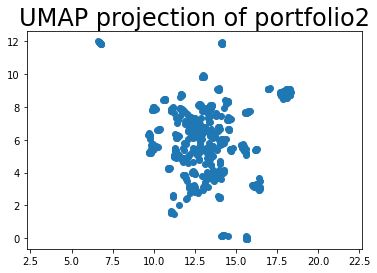

In [27]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of portfolio2', fontsize=24)

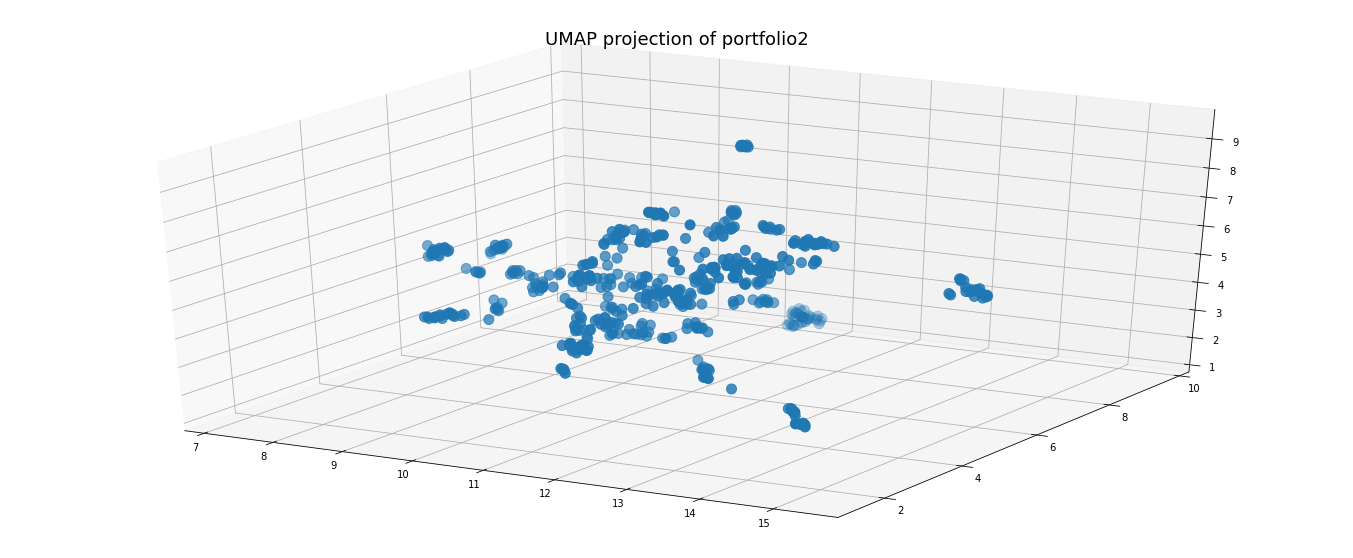

In [28]:

def draw_umap(data, n_neighbors, min_dist, n_components, title, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(24,10))
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    
title = 'UMAP projection of portfolio2'    
draw_umap(portfolio2,14,0.1,3,title)

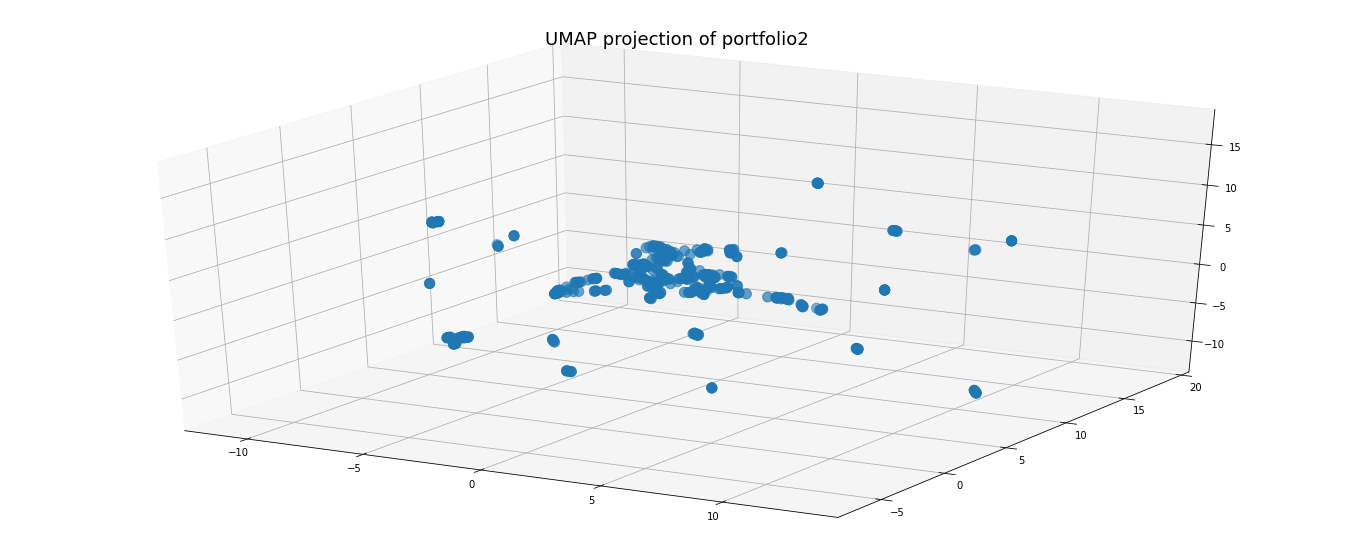

In [29]:
#low n_neighbours focus more on local distribution
draw_umap(portfolio2,5,0.1,3,title)

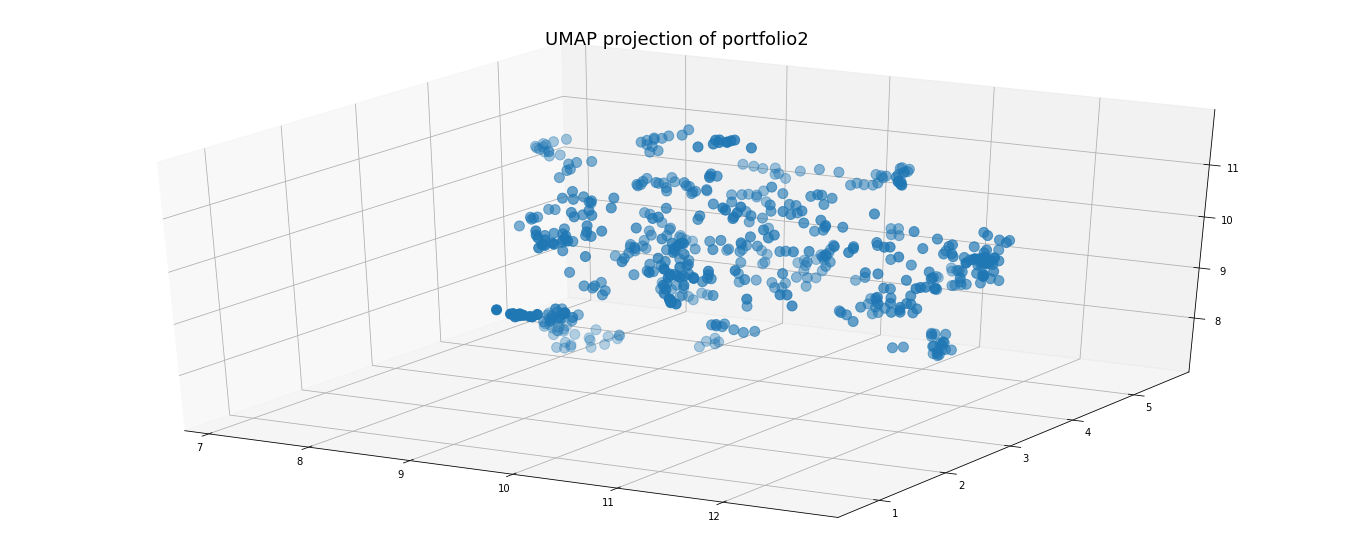

In [30]:
#high n_neighbours focus more on global distribution
draw_umap(portfolio2,50,0.1,3,title)

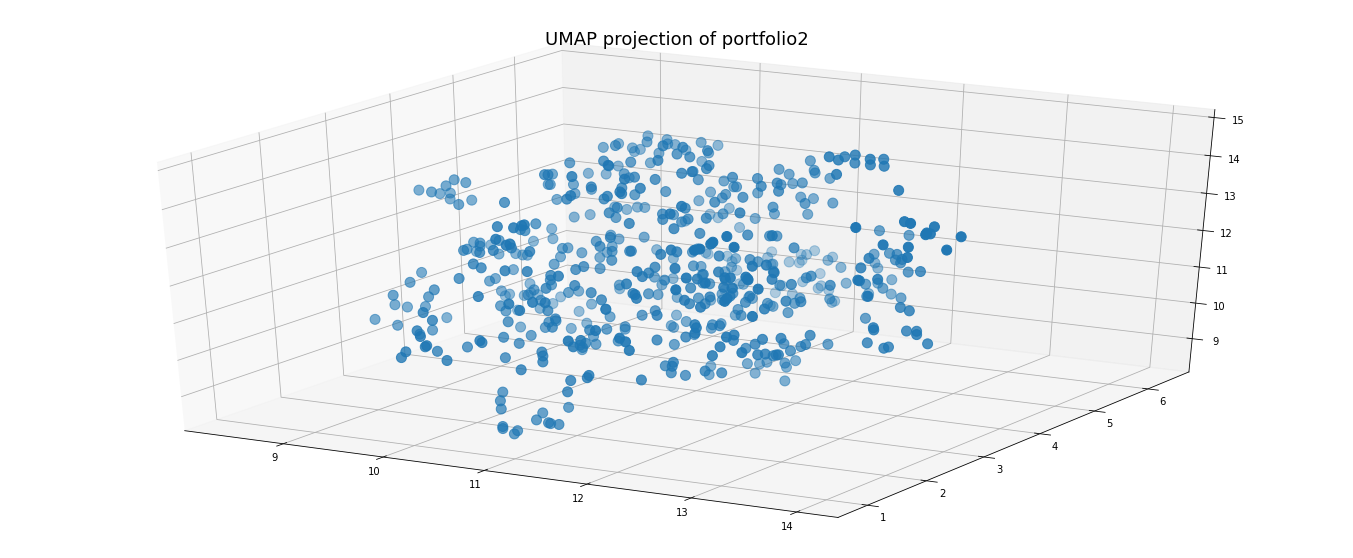

In [31]:
draw_umap(portfolio2,50,0.5,3,title)

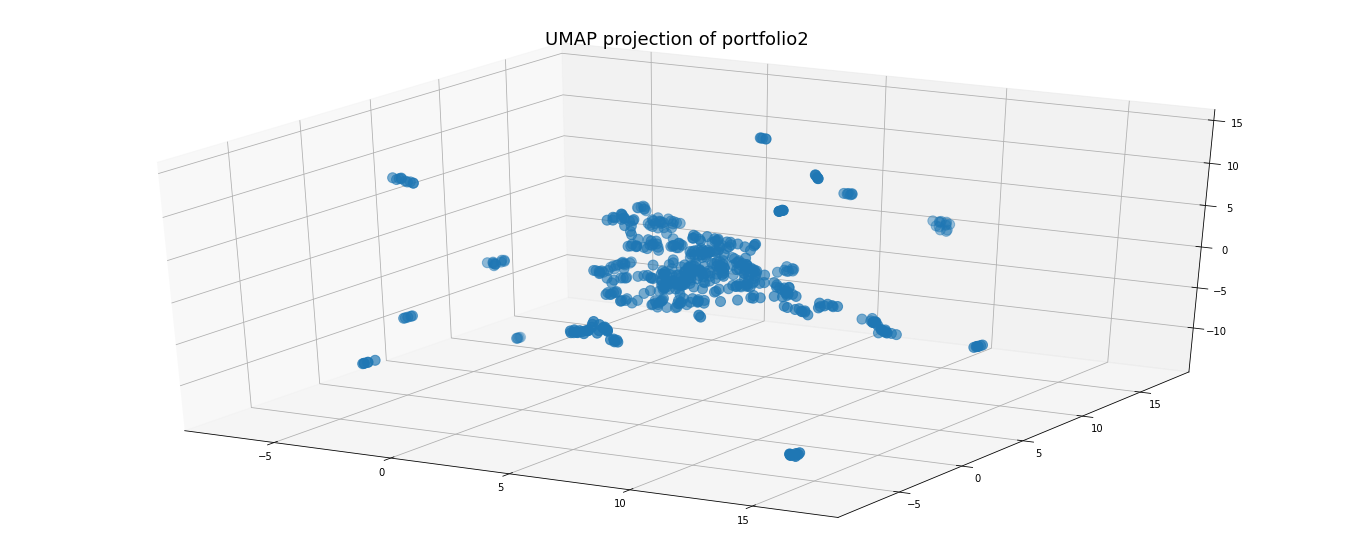

In [32]:
draw_umap(portfolio2,5,0.5,3,title)

In [33]:
from sklearn.neighbors import LocalOutlierFactor

outlier_scores = LocalOutlierFactor(contamination=0.001428).fit_predict(portfolio2)

In [34]:
outlying_digits = portfolio2[outlier_scores == -1]
outlying_digits.shape

(1, 174)

In [35]:
mapper = umap.UMAP().fit(portfolio2)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)

In [36]:
outlying_digits_umap = portfolio2[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 174)

In [37]:
mapper = umap.UMAP(set_op_mix_ratio=0.25).fit(portfolio2)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)
outlying_digits_umap = portfolio2[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 174)

In [38]:

fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )
u = fit.fit_transform(portfolio2)

In [39]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = random_state)
    kmeans.fit(u)
    wss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wss, name='elbow', mode='lines'))

fig.update_layout(title='The Elbow Method', 
                  xaxis={"title": "Number of clusters"},
                  yaxis={"title": "Within Sum of Squares"})

fig.show()

In [40]:
X = fit.fit_transform(portfolio2)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

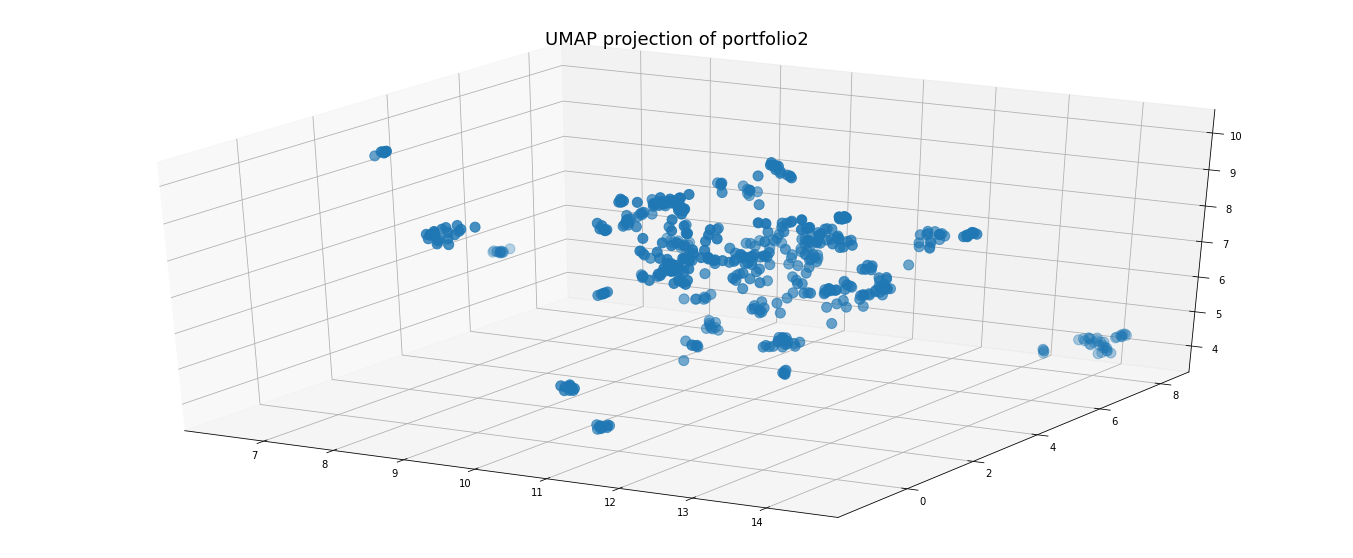

In [41]:
draw_umap(df,14,0.1,3,title)

In [42]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )

X = fit.fit_transform(df)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()